In [14]:
from emcee.backends import HDFBackend
import corner
import matplotlib.pyplot as plt
import numpy as np

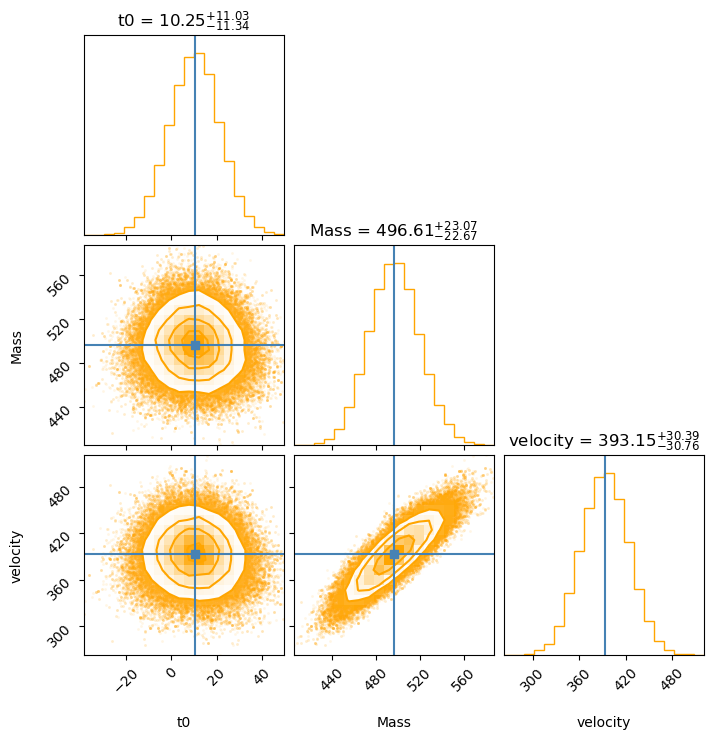

In [22]:
backend = HDFBackend('backend_v2.h5')
chain = backend.get_chain(discard=500, flat=True)
fig = corner.corner(chain, color='orange', show_titles=True, labels=['t0', 'Mass', 'velocity'], truths=np.percentile(chain, 50, axis=0))
plt.savefig('./MCMC-shape-only.pdf')

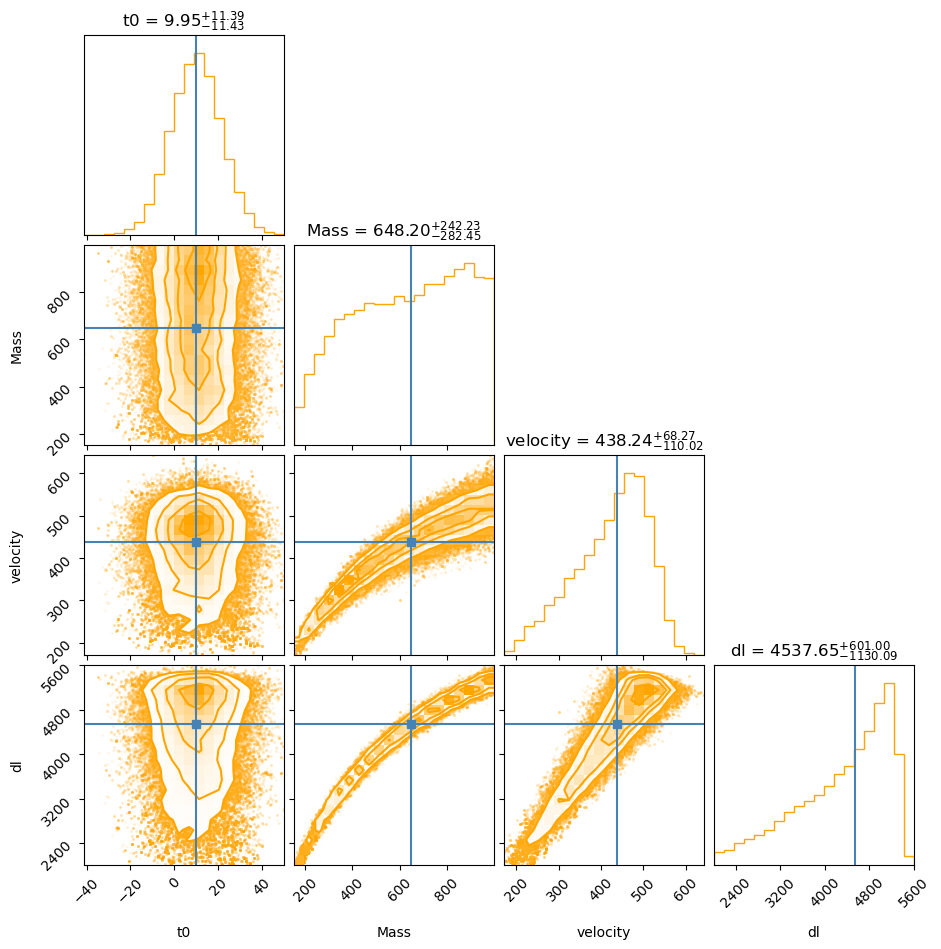

In [23]:
backend = HDFBackend('backend_free_dl.h5')
chain = backend.get_chain(discard=500, flat=True)
fig = corner.corner(chain, color='orange', show_titles=True, labels=['t0', 'Mass', 'velocity', 'dl'], truths=np.percentile(chain, 50, axis=0))
plt.savefig('./MCMC-shape-only-2.pdf')

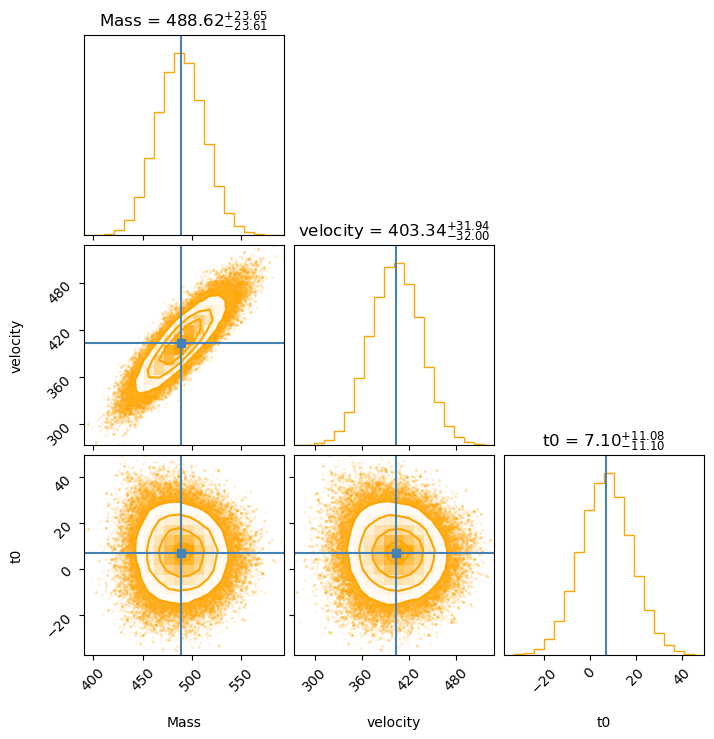

In [4]:
backend = HDFBackend('backend_3p.h5')
chain = backend.get_chain(discard=500, flat=True)
fig = corner.corner(chain, color='orange', show_titles=True, labels=['Mass', 'velocity', 't0'], truths=np.percentile(chain, 50, axis=0))

In [5]:
from scipy.interpolate import RegularGridInterpolator
import numpy as np
table = np.load('ellip_table.npy')

with open('table_arguments.npy', 'rb') as f:
    t = np.load(f)
    M = np.load(f)
    v = np.load(f)


interpolator = RegularGridInterpolator((M, v, t), table, bounds_error=False)
def get_data(t0, M0, v0):
    abs_t = np.abs(t0)          # assume t0 is from -t_E to t_E, the curve is symetrical.
    new_x = np.stack((np.ones_like(t0)*M0, np.ones_like(t0)*v0, abs_t), axis=-1)
    return interpolator(new_x)

In [6]:
t_obs, e_obs, err_obs = np.load('mock1.npy')

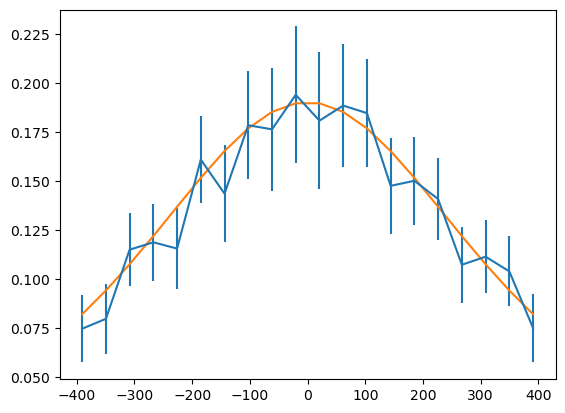

In [8]:
plt.errorbar(t_obs, e_obs, err_obs)
plt.plot(t_obs, get_data(t_obs, 500, 400))
# plt.plot(t, table[-1,0])